## US Tropical Storm Data: 1852-1965, 1983-2019
To develop insights from storm data. 
Some Questions: 
What does the data actually say?
Are Tropical storms more common now than in the past?

In [173]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv("data/tropical_storm_data.csv")

In [174]:
df

,Storm #,Date,Time,Lat,Lon,Max,Landfall,Storm
0,1850s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,10/19/1851,1500Z,41.1N,71.7W,50.0,NY,NaN
2,1852,None,NaN,NaN,NaN,NaN,NaN,NaN
3,1853,None,NaN,NaN,NaN,NaN,NaN,NaN
4,1854,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
391,15,9/27/2017*,1800Z,36,72.6,45.0,NC,Maria
392,1,5/28/2018,2100Z,30.5,86,40.0,FL,Alberto
393,7,9/3/2018,1115Z,25,80.5,45.0,FL,Gordon
394,7,9/3/2018,1315Z,25.2,80.9,45.0,FL,Gordon


### Cleaning Up the Tropical Storm Data
- The row representing years without events should be removed
- Replace all such string like $, *, #, % and & in the Date column with nothing
- Next, I'll reset the colunm headers. So it would be easier to work with.
- Check the columns data types
- Covert the Date to a new format

In [175]:
# The row representing years without events should be dropped
df = df[(df["Date"].str.contains("None")) == False]
df


,Storm #,Date,Time,Lat,Lon,Max,Landfall,Storm
1,6,10/19/1851,1500Z,41.1N,71.7W,50.0,NY,NaN
6,3,8/19/1856,1100Z,34.8,76.4,50.0,NC,NaN
7,4,9/30/1857$,1000Z,25.8,97,50.0,TX,NaN
8,3,9/14/1858$,1500Z,27.6,82.7,60.0,FL,NaN
9,3,9/16/1858*,0300Z,35.2,75.2,50.0,NC,NaN
...,...,...,...,...,...,...,...,...
391,15,9/27/2017*,1800Z,36,72.6,45.0,NC,Maria
392,1,5/28/2018,2100Z,30.5,86,40.0,FL,Alberto
393,7,9/3/2018,1115Z,25,80.5,45.0,FL,Gordon
394,7,9/3/2018,1315Z,25.2,80.9,45.0,FL,Gordon


In [176]:
# Replace all such string like $, *, #, % and & in 
# the Date column with nothing
dfc = df.copy()

# dfd["Date"] = dfd.loc[:, "Date"].str.replace("\$", "", regex=True)
# dfd["Date"] = dfd.loc[:, "Date"].str.replace("\*", "", regex=True)
# dfd["Date"] = dfd.loc[:, "Date"].str.replace("\#", "", regex=True)
# dfd["Date"] = dfd.loc[:, "Date"].str.replace("\%", "", regex=True)
# dfd["Date"] = dfd.loc[:, "Date"].str.replace("\&", "", regex=True)

# dfd["Date"] = dfd.loc[:, "Date"]


def replace_all_such_string(str):
    special_chars = "$*#%&"
    for special_char in special_chars:
        replaced_string = str.str.replace(special_char, "", regex=True)
    return replaced_string

dfc["Date"] = replace_all_such_string(dfc.loc[:, "Date"])
df = dfc
df.head()



,Storm #,Date,Time,Lat,Lon,Max,Landfall,Storm
1,6,10/19/1851,1500Z,41.1N,71.7W,50.0,NY,NaN
6,3,8/19/1856,1100Z,34.8,76.4,50.0,NC,NaN
7,4,9/30/1857$,1000Z,25.8,97,50.0,TX,NaN
8,3,9/14/1858$,1500Z,27.6,82.7,60.0,FL,NaN
9,3,9/16/1858*,0300Z,35.2,75.2,50.0,NC,NaN


In [164]:
# Reset the Column headers
df.columns = ["Storm#", "Date", "Time", "Lat", "Lon", 
              "MaxWinds", "LandfallState","StormName"]

In [165]:
# Check the column Data types
df.dtypes

Storm#            object
Date              object
Time              object
Lat               object
Lon               object
MaxWinds         float64
LandfallState     object
StormName         object
dtype: object

In [166]:
# Covert the date a new format
df["Date"] = pd.to_datetime(df["Date"])
df

,Storm#,Date,Time,Lat,Lon,MaxWinds,LandfallState,StormName
1,6,1851-10-19,1500Z,41.1N,71.7W,50.0,NY,NaN
6,3,1856-08-19,1100Z,34.8,76.4,50.0,NC,NaN
7,4,1857-09-30,1000Z,25.8,97,50.0,TX,NaN
8,3,1858-09-14,1500Z,27.6,82.7,60.0,FL,NaN
9,3,1858-09-16,0300Z,35.2,75.2,50.0,NC,NaN
...,...,...,...,...,...,...,...,...
391,15,2017-09-27,1800Z,36,72.6,45.0,NC,Maria
392,1,2018-05-28,2100Z,30.5,86,40.0,FL,Alberto
393,7,2018-09-03,1115Z,25,80.5,45.0,FL,Gordon
394,7,2018-09-03,1315Z,25.2,80.9,45.0,FL,Gordon


### Presenting Tropical Storm Data
For our purposes, the only data column that really matters is MaxWinds - as that, obviously, is what defines the intensity of the storm. This command will create a new dataframe made up of the Date and MaxWinds columns:


In [139]:
df1 = df[["Date", "MaxWinds"]]

<AxesSubplot:>

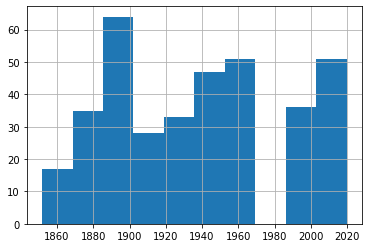

In [140]:
df1["Date"].hist()

In [141]:
df1.shape

(362, 2)

### More
So let’s divide our data into four smaller sets as reasonable proxies for storms of various levels of intensity. I’ve created four dataframes and populated them with events falling in their narrower ranges (i.e., between 30 and 39 knots, 40 and 49, 50 and 59, and 60 and 79). This should give us a reasonable frame of reference for our events.

In [142]:
df_30 = df1[df1["MaxWinds"].between(30, 39)]
df_40 = df1[df1["MaxWinds"].between(40, 49)]
df_50 = df1[df1["MaxWinds"].between(50, 59)]
df_60 = df1[df1["MaxWinds"].between(60, 79)]

In [143]:
st1 = len(df_30.index)
print('The number of storms between 30 and 39: ', st1)
st2 = len(df_40.index)
print('The number of storms between 40 and 49: ', st2)
st3 = len(df_50.index)
print('The number of storms between 50 and 59: ', st3)
st4 = len(df_60.index)
print('The number of storms between 60 and 79: ', st4)


The number of storms between 30 and 39:  51
The number of storms between 40 and 49:  113
The number of storms between 50 and 59:  142
The number of storms between 60 and 79:  56


In [144]:
df_40["MaxWinds"].value_counts()

40.0    71
45.0    42
Name: MaxWinds, dtype: int64

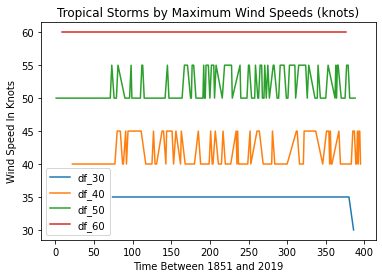

In [145]:
# Plot a single line graph to dispaly all four of our subsset together.
# The subplot(111) value controls the size of the figure
fig = plt.figure()
ax = plt.subplot(111)
df_30["MaxWinds"].plot(ax=ax, label="df_30")
df_40["MaxWinds"].plot(ax=ax, label="df_40")
df_50["MaxWinds"].plot(ax=ax, label="df_50")
df_60["MaxWinds"].plot(ax=ax, label="df_60")
ax.set_ylabel("Wind Speed In Knots")
ax.set_xlabel("Time Between 1851 and 2019")
plt.title("Tropical Storms by Maximum Wind Speeds (knots)")
ax.legend()


This can be helpful for confirming that we’re not making a mess of the data itself. Checking visually will show, for instance, that there was, indeed, only a single 30 knot event in our dataset and that it took place towards the end of our time frame in 2016. But it’s not a great way to show us changes in event frequency.

<AxesSubplot:>

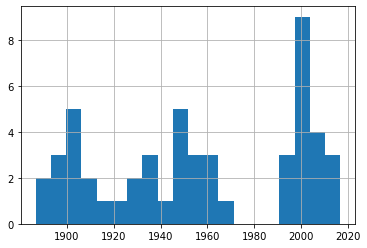

In [146]:
df_30["Date"].hist(bins=20)

<AxesSubplot:>

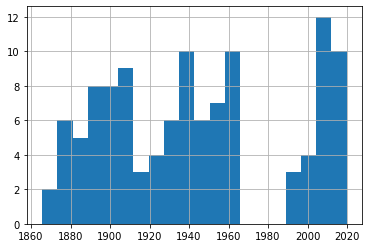

In [147]:
df_40["Date"].hist(bins=20)

<AxesSubplot:>

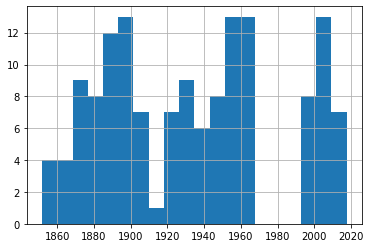

In [148]:
df_50["Date"].hist(bins=20)

<AxesSubplot:>

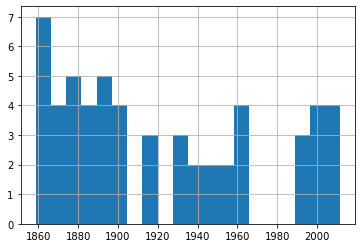

In [149]:
df_60["Date"].hist(bins=20)

A quick glance through those four plots shows us fairly consistent event frequency through the 150 years or so of our data. Again, try it yourself using different numbers of bins to make sure we’re not missing some important trends.

In [150]:
df

,Storm#,Date,Time,Lat,Lon,MaxWinds,LandfallState,StormName
1,6,1851-10-19,1500Z,41.1N,71.7W,50.0,NY,NaN
6,3,1856-08-19,1100Z,34.8,76.4,50.0,NC,NaN
7,4,1857-09-30,1000Z,25.8,97,50.0,TX,NaN
8,3,1858-09-14,1500Z,27.6,82.7,60.0,FL,NaN
9,3,1858-09-16,0300Z,35.2,75.2,50.0,NC,NaN
...,...,...,...,...,...,...,...,...
391,15,2017-09-27,1800Z,36,72.6,45.0,NC,Maria
392,1,2018-05-28,2100Z,30.5,86,40.0,FL,Alberto
393,7,2018-09-03,1115Z,25,80.5,45.0,FL,Gordon
394,7,2018-09-03,1315Z,25.2,80.9,45.0,FL,Gordon
